In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Activation, LSTM, GRU
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd
import scipy.stats

In [ ]:
uploaded = files.upload()
df2 = pd.read_csv(io.BytesIO(uploaded['temperature.csv']))

Saving temperature.csv to temperature.csv


In [ ]:
df2.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [ ]:
df = df2[['Los Angeles']].copy()
df = df.dropna()
df = df.apply(lambda x: x-273.15)
df.head()

,Los Angeles
1,18.720000
2,18.718186
3,18.712844
4,18.707503
5,18.702162


array([[<Axes: title={'center': 'Los Angeles'}>]], dtype=object)

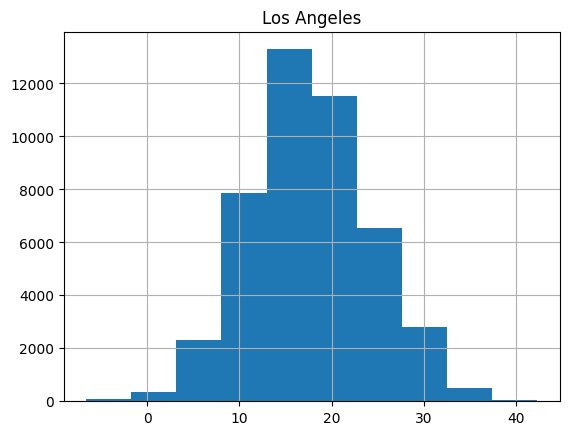

In [ ]:
df.hist()

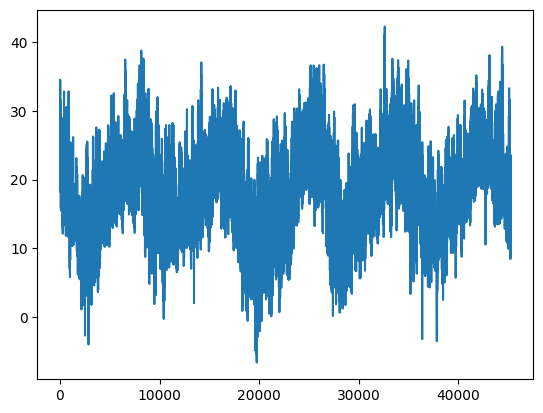

In [ ]:
plt.plot(df.values)

In [ ]:
input_size = 24

In [ ]:
def prepare_data(data, input_size):
    x, y = [], []
    for i in range(len(data)-input_size-1):
        x.append(data[i:(i+input_size)])
        y.append(data[i+input_size])
    return np.array(x), np.array(y)

In [ ]:
data = df.to_numpy(copy=True)
data = np.squeeze(data)
x, y = prepare_data(data, input_size)

train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
EarlyStop = EarlyStopping(monitor='val_loss', 
                          patience=5,
                          verbose=1)

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(input_size, 1)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])


In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[EarlyStop])


Epoch 1/50
1131/1131 [==============================] - 25s 20ms/step - loss: 24.4845 - root_mean_squared_error: 4.9482 - val_loss: 1.2896 - val_root_mean_squared_error: 1.1356
Epoch 2/50
1131/1131 [==============================] - 29s 26ms/step - loss: 1.8201 - root_mean_squared_error: 1.3491 - val_loss: 0.7653 - val_root_mean_squared_error: 0.8748
Epoch 3/50
1131/1131 [==============================] - 19s 17ms/step - loss: 1.5596 - root_mean_squared_error: 1.2488 - val_loss: 0.7334 - val_root_mean_squared_error: 0.8564
Epoch 4/50
1131/1131 [==============================] - 18s 16ms/step - loss: 1.4905 - root_mean_squared_error: 1.2209 - val_loss: 0.7037 - val_root_mean_squared_error: 0.8389
Epoch 5/50
1131/1131 [==============================] - 18s 16ms/step - loss: 1.4492 - root_mean_squared_error: 1.2038 - val_loss: 0.6045 - val_root_mean_squared_error: 0.7775
Epoch 6/50
1131/1131 [==============================] - 21s 18ms/step - loss: 1.4032 - root_mean_squared_error: 1.1846 

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[EarlyStop])


Epoch 1/50
1131/1131 [==============================] - 19s 16ms/step - loss: 1.0914 - root_mean_squared_error: 1.0447 - val_loss: 0.5551 - val_root_mean_squared_error: 0.7450
Epoch 2/50
1131/1131 [==============================] - 19s 17ms/step - loss: 1.0892 - root_mean_squared_error: 1.0437 - val_loss: 0.5219 - val_root_mean_squared_error: 0.7224
Epoch 3/50
1131/1131 [==============================] - 20s 18ms/step - loss: 1.0652 - root_mean_squared_error: 1.0321 - val_loss: 0.5536 - val_root_mean_squared_error: 0.7440
Epoch 4/50
1131/1131 [==============================] - 18s 16ms/step - loss: 1.0615 - root_mean_squared_error: 1.0303 - val_loss: 0.5315 - val_root_mean_squared_error: 0.7290
Epoch 5/50
1131/1131 [==============================] - 21s 18ms/step - loss: 1.0347 - root_mean_squared_error: 1.0172 - val_loss: 0.5925 - val_root_mean_squared_error: 0.7697
Epoch 6/50
1131/1131 [==============================] - 18s 16ms/step - loss: 1.0450 - root_mean_squared_error: 1.0222 -

In [ ]:
def predict_four_days(test):
  predictions = []
  for _ in range(4):
    pred = model.predict(test)
    predictions.extend(pred)
    test = np.delete(test,0)
    test = np.append(test, pred)
    test = np.array([test])
  return predictions

In [ ]:
p = predict_four_days(x_test[0, np.newaxis])
p

1/1 [==============================] - 0s 36ms/step


[array([16.23844], dtype=float32),
 array([15.2600765], dtype=float32),
 array([14.551428], dtype=float32),
 array([13.968699], dtype=float32)]

In [ ]:
input_size = 24
model = Sequential()
model.add(GRU(32, input_shape=(input_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])#'accuracy'

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test), callbacks=[EarlyStop])

Epoch 1/50
2262/2262 [==============================] - 41s 17ms/step - loss: 30.2819 - accuracy: 0.0000e+00 - val_loss: 1.8388 - val_accuracy: 0.0000e+00
Epoch 2/50
2262/2262 [==============================] - 35s 15ms/step - loss: 2.1412 - accuracy: 0.0000e+00 - val_loss: 0.7928 - val_accuracy: 0.0000e+00
Epoch 3/50
2262/2262 [==============================] - 34s 15ms/step - loss: 1.5854 - accuracy: 0.0000e+00 - val_loss: 0.7644 - val_accuracy: 0.0000e+00
Epoch 4/50
2262/2262 [==============================] - 34s 15ms/step - loss: 1.4820 - accuracy: 0.0000e+00 - val_loss: 0.7210 - val_accuracy: 0.0000e+00
Epoch 5/50
2262/2262 [==============================] - 34s 15ms/step - loss: 1.4166 - accuracy: 0.0000e+00 - val_loss: 0.6349 - val_accuracy: 0.0000e+00
Epoch 6/50
2262/2262 [==============================] - 34s 15ms/step - loss: 1.3780 - accuracy: 0.0000e+00 - val_loss: 0.6798 - val_accuracy: 0.0000e+00
Epoch 7/50
2262/2262 [==============================] - 35s 16ms/step - los

In [ ]:
p = predict_four_days(x_test[0, np.newaxis])
p

1/1 [==============================] - 0s 36ms/step


[array([1.], dtype=float32),
 array([0.9999877], dtype=float32),
 array([0.99942046], dtype=float32),
 array([-0.3254107], dtype=float32)]

In [ ]:
#rysowanie procesu uczenia
def draw_curves(history, key1='accuracy'):
    plt.figure(figsize=(12,6))
    plt.plot(history.history[key1], "r--")
    plt.plot(history.history['val_' + key1], "g--")
    plt.ylabel(key1)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='best')
 
    plt.show()

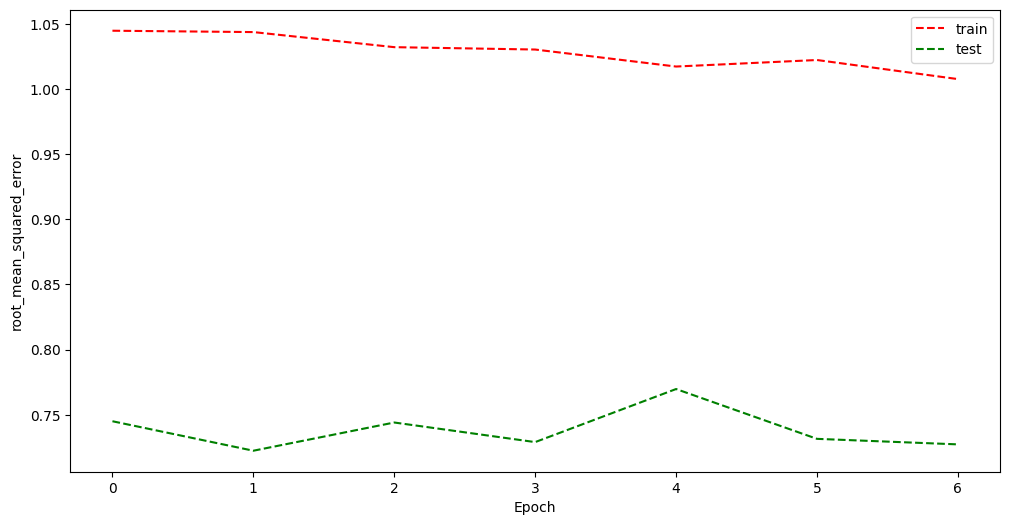

In [ ]:
#proces uczenia danych testowych i treningowych dla sieci LSTM
draw_curves(history, key1='root_mean_squared_error')

In [ ]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test accuracy:", results)

Evaluate on test data
71/71 [==============================] - 1s 14ms/step - loss: 0.5289 - root_mean_squared_error: 0.7273
test loss, test accuracy: [0.5289167165756226, 0.7272666096687317]


In [ ]:
#Miary dla modelu z siecię LSTM
print ("RMSE:" +str(np.sqrt(mean_squared_error(y_test[:4], p))))
print ("MSE:" +str((mean_squared_error(y_test[:4], p))))


RMSE:0.9208787704212431
MSE:0.8480177098125405


In [ ]:
print ("MAE: " +str(np.mean(abs(y_test[:4]-p))))
ia = (1 -(np.sum((p-y_test[:4])**2))/(np.sum((np.abs(y_test[:4]-np.mean(p))+np.abs(p-np.mean(p)))**2)))
print ("Ia: " +str(ia))

MAE: 1.1597635555267516
Ia: 0.41865294250124707


In [ ]:
print ("R^2: " +str(r2_score(p, y_test[:4])))

R^2: -0.18352141432977231


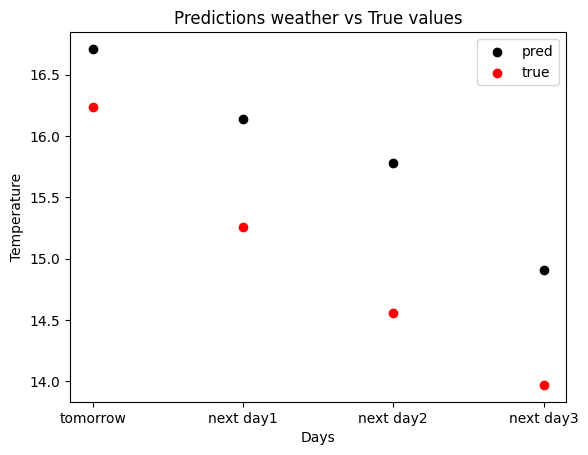

In [ ]:
plt.scatter(['tomorrow','next day1','next day2','next day3'] ,y_test[:4], color='black')
plt.scatter(['tomorrow','next day1','next day2','next day3'],p , color='red')
plt.title('Predictions weather vs True values')
plt.ylabel('Temperature')
plt.xlabel('Days')
plt.legend(['pred', 'true'], loc='best')
plt.show()

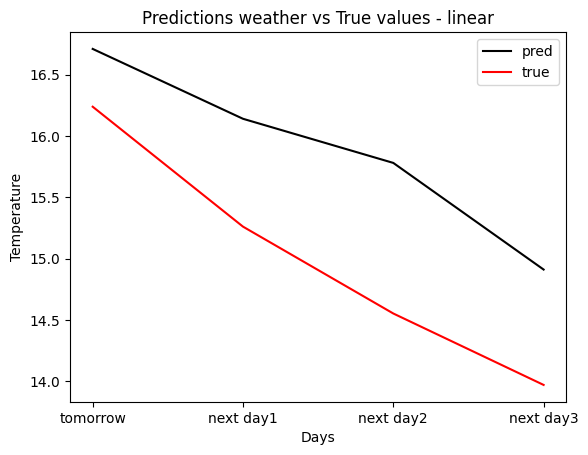

In [ ]:
plt.plot(['tomorrow','next day1','next day2','next day3'] ,y_test[:4], color='black')
plt.plot(['tomorrow','next day1','next day2','next day3'],p , color='red')
plt.title('Predictions weather vs True values - linear')
plt.ylabel('Temperature')
plt.xlabel('Days')
plt.legend(['pred', 'true'], loc='best')
plt.show()

283/283 [==============================] - 2s 6ms/step


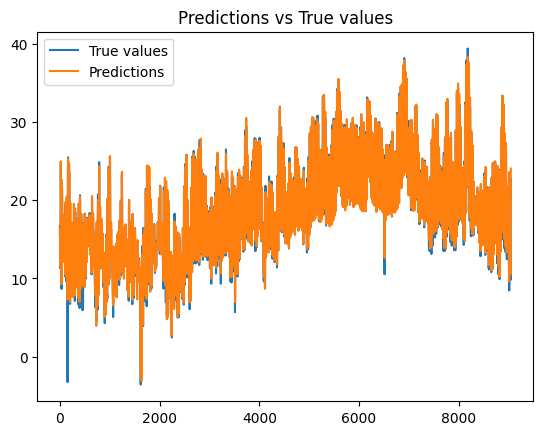

In [ ]:
#dla całego modelu porównanie
predictions = model.predict(x_test)

plt.plot(y_test, label='True values')
plt.plot(predictions, label='Predictions')

plt.title('Predictions vs True values')
plt.legend()
plt.show()